In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import skew
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold,
                                     GridSearchCV, RandomizedSearchCV, cross_val_score)
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve)
from sklearn.decomposition import PCA

In [4]:
#Load the Data
df=pd.read_csv("C:/Users/500236355/Downloads/churn_data_bank/bank_data_train.csv")
df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [5]:
df.tail()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
355185,590822,0,0.000000,0.0,NaN,0.0,0.0,0.0,0.142857,0.123579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
355186,590823,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
355187,590825,0,0.041298,NaN,NaN,NaN,NaN,0.0,0.089286,0.065293,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
355188,590826,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
355189,590828,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1


In [6]:
df.shape

(355190, 116)

In [7]:
#Data Cleaning & Pre-processing

# 1. Changing the columon name from caps to lowercase for improving the readability

#Looping the column names

for col in df.columns:
  # Check if the column name is uppercase
  if col.isupper():
    # Rename the column to lowercase
    df.rename(columns={col: col.lower()}, inplace=True)

df.columns

Index(['id', 'cr_prod_cnt_il', 'amount_rub_clo_prc',
       'prc_accepts_a_email_link', 'app_registr_rgn_code', 'prc_accepts_a_pos',
       'prc_accepts_a_tk', 'turnover_dynamic_il_1m', 'cnt_tran_aut_tendency1m',
       'sum_tran_aut_tendency1m',
       ...
       'rest_dynamic_cc_3m', 'med_debt_prc_ywz', 'ldeal_act_days_pct_tr3',
       'ldeal_act_days_pct_aavg', 'ldeal_delinq_per_maxywz',
       'turnover_dynamic_cc_3m', 'ldeal_act_days_pct_tr',
       'ldeal_act_days_pct_tr4', 'ldeal_act_days_pct_curr', 'target'],
      dtype='object', length=116)

In [8]:
#Now using the describe function to understand the data better

df.describe(include='all')

,id,cr_prod_cnt_il,amount_rub_clo_prc,prc_accepts_a_email_link,app_registr_rgn_code,prc_accepts_a_pos,prc_accepts_a_tk,turnover_dynamic_il_1m,cnt_tran_aut_tendency1m,sum_tran_aut_tendency1m,...,rest_dynamic_cc_3m,med_debt_prc_ywz,ldeal_act_days_pct_tr3,ldeal_act_days_pct_aavg,ldeal_delinq_per_maxywz,turnover_dynamic_cc_3m,ldeal_act_days_pct_tr,ldeal_act_days_pct_tr4,ldeal_act_days_pct_curr,target
count,355190.000000,355190.000000,316867.000000,155163.0,60550.000000,155163.0,155163.0,355190.000000,77112.000000,77112.000000,...,355190.000000,95713.000000,93448.000000,98175.000000,95713.000000,355190.000000,93448.000000,93448.000000,93448.000000,355190.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,368794.674875,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,...,0.007309,0.055074,0.025707,0.049943,0.009252,0.004309,0.013938,0.013938,0.013938,0.081435
std,128148.804566,0.431372,0.108449,0.0,21.777855,0.0,0.0,0.029118,0.316493,0.338612,...,0.066681,0.215909,0.115732,0.185830,0.092789,0.059852,0.097099,0.097099,0.097099,0.273503
min,146841.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.0,33.000000,0.0,0.0,0.000000,0.166667,0.139645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479737.750000,0.000000,0.036608,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.661195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
#Now we can see that prc_accept_a_tk have values of NaN and 0

df['prc_accepts_a_tk'].unique()

array([nan,  0.])

In [10]:
#We will now create a function to get the column names which has 'NaN' and '0'

#Identifying the columns containing values only with 'NaN' and '0'

zero_and_nan_columns = df.columns[((df == 0) | df.isnull()).all()]
zero_and_nan_columns.values

array(['prc_accepts_a_email_link', 'prc_accepts_a_pos',
       'prc_accepts_a_tk', 'prc_accepts_a_amobile', 'prc_accepts_tk',
       'prc_accepts_a_mtp', 'cnt_accepts_tk', 'prc_accepts_a_atm',
       'prc_accepts_mtp', 'cnt_accepts_mtp'], dtype=object)

In [11]:
#Since there are 10 colums which contain 'Nan' and '0' hence this will impact our machine learning model and this does not give any meaningful
#difference between the data points, and making difficult for the model to learn the patterns and realtionships with the data's, and this will lead
#to poor model performance and inaccurate prediction.

# 2. Dropping the columns containing 'NaN' and '0' value

df = df.drop(columns=zero_and_nan_columns)
df.shape

(355190, 106)

In [12]:
#We manually checked in csv file that there are 2 columns containing foreign language when we checked in google it was russian language

df['clnt_trust_relation'].unique()

array([nan, 'MOTHER', 'BROTHER', 'FRIEND', 'SISTER', 'OTHER', 'RELATIVE',
       'DAUGHTER', 'SON', 'FATHER', 'Близкий ро', 'Друг', 'Отец',
       'Сестра', 'Сын', 'Мать', 'Муж', 'Брат', 'мать', 'Дальний ро',
       'Дочь', 'Жена'], dtype=object)

In [13]:
# 3. Translate russian to english

#after creating the dictionary with the russian value we will apply function to translate the values

def replace_russian_values(df, columns_to_translate, russian_to_english_dict):

  #Creating copy to avoiding any mistakes with actual data
  replaced_df = df.copy()

  #Replace values in specified columns
  for col in columns_to_translate:
    replaced_df[col] = replaced_df[col].replace(russian_to_english_dict)

  return replaced_df

#Russian to English dictionary
russian_to_english_dict = {
    "MOTHER": "mother",
    "BROTHER": "brother",
    "FRIEND": "friend",
    "SISTER": "sister",
    "OTHER": "other",
    "RELATIVE": "relative",
    "DAUGHTER": "daughter",
    "SON": "son",
    "FATHER": "father",
    "Близкий ро": "close ro",
    "Друг": "friend",
    "Отец": "father",
    "Сестра": "sister",
    "Сын": "son",
    "Мать": "mother",
    "Муж": "husband",
    "Брат": "brother",
    "мать": "mother",
    "Дальний ро": "far ro",
    "Дочь": "daughter",
    "Жена": "wife",
    "начальник отдела": "department head",
    "ГЕНЕРАЛЬНЫЙ ДИРЕКТОР": "ceo",
    "Эксперт контакт Центра": "expert contact center",
    "ПРОХЛДЧИК": "cool",
    "ХУДОЖНИК КОМПЬЮТЕРНОЙ ГРАФИКИ": "computer graphics artist",

}

#Columns to replace, replacing with actual column name
columns_to_translate = ['clnt_trust_relation', 'clnt_job_position']

#Replacing the specified columns
df = replace_russian_values(df, columns_to_translate, russian_to_english_dict)

In [14]:
#Now checking for the unique values

df['clnt_trust_relation'].unique()


array([nan, 'mother', 'brother', 'friend', 'sister', 'other', 'relative',
       'daughter', 'son', 'father', 'close ro', 'husband', 'far ro',
       'wife'], dtype=object)

In [15]:
df['clnt_job_position'].unique()

array(['department head', nan, 'ceo', ..., 'expert contact center',
       'cool', 'computer graphics artist'], dtype=object)

In [16]:
# 4. Managing the null values

def count_nulls(df):
    for column in df.columns:
        print(f'Nulls in column {column}:', df[column].isnull().sum())

count_nulls(df)

Nulls in column id: 0
Nulls in column cr_prod_cnt_il: 0
Nulls in column amount_rub_clo_prc: 38323
Nulls in column app_registr_rgn_code: 294640
Nulls in column turnover_dynamic_il_1m: 0
Nulls in column cnt_tran_aut_tendency1m: 278078
Nulls in column sum_tran_aut_tendency1m: 278078
Nulls in column amount_rub_sup_prc: 38323
Nulls in column sum_tran_aut_tendency3m: 244138
Nulls in column clnt_trust_relation: 285769
Nulls in column rest_dynamic_fdep_1m: 0
Nulls in column cnt_tran_aut_tendency3m: 244138
Nulls in column app_marital_status: 286956
Nulls in column rest_dynamic_save_3m: 0
Nulls in column cr_prod_cnt_vcu: 0
Nulls in column rest_avg_cur: 0
Nulls in column cnt_tran_med_tendency1m: 286223
Nulls in column app_kind_of_prop_habitation: 295829
Nulls in column clnt_job_position_type: 310409
Nulls in column amount_rub_nas_prc: 38323
Nulls in column clnt_job_position: 144379
Nulls in column app_driving_license: 297933
Nulls in column trans_count_sup_prc: 38323
Nulls in column app_education

In [17]:
# Since there are many columns with high number of missing values, to check for relevancy we will calculate the percentage of null values in each
#column and sort them in decending order, this will give the columns with most missing data.

def get_null_value_counts(df):

  null_counts = df.isna().sum()
  null_counts_df = pd.DataFrame({'column_name': null_counts.index, 'null_count': null_counts.values})

  return null_counts_df

# Get null value counts
null_counts_df = get_null_value_counts(df)
null_counts_df = null_counts_df.sort_values(by='null_count', ascending=False)
null_counts_df['pcnt_null'] = null_counts_df['null_count'] / df.shape[0]


In [18]:
null_counts_df.head(10)

,column_name,null_count,pcnt_null
86,clnt_salary_value,354478,0.997995
49,ldeal_yqz_com,353950,0.996509
46,ldeal_yqz_chrg,353949,0.996506
69,avg_pct_month_to_pclose,353562,0.995417
79,max_pclose_date,353309,0.994704
94,avg_pct_debt_to_deal_amt,353302,0.994685
55,ldeal_amt_month,353302,0.994685
80,ldeal_yqz_pc,352382,0.992094
45,ldeal_tenor_max,347189,0.977474
50,deal_yqz_ir_min,347189,0.977474


In [19]:
#Since our first analysis showed 72 columns with a significance amount of missing data, with 30% of null values. To improve the data quality and model
#performance we will focus on removing the column with most missing values, then we will get threshold of 70% null values. Any column exceding this limit
# we will drop from dataset. Hence this gives us column with reasonable amount of data for analysis with excluding the values which contribute does not
# give meaning because of missing info.

In [20]:
def drop_irrelevant_columns(df, null_value_threshold=50000):

  null_counts = df.isnull().sum()
  columns_to_drop = null_counts[null_counts > null_value_threshold].index.tolist()
  return df.drop(columns_to_drop, axis=1)


df = drop_irrelevant_columns(df)
df.shape

(355190, 42)

In [21]:
null_counts_df.head(12)


,column_name,null_count,pcnt_null
86,clnt_salary_value,354478,0.997995
49,ldeal_yqz_com,353950,0.996509
46,ldeal_yqz_chrg,353949,0.996506
69,avg_pct_month_to_pclose,353562,0.995417
79,max_pclose_date,353309,0.994704
94,avg_pct_debt_to_deal_amt,353302,0.994685
55,ldeal_amt_month,353302,0.994685
80,ldeal_yqz_pc,352382,0.992094
45,ldeal_tenor_max,347189,0.977474
50,deal_yqz_ir_min,347189,0.977474


In [22]:
#Since we still have 46 columns with 11 have missing value, also some of them could have important values which contain important info

#The column named amount_rub_atm_prc capture the proportion of client spending involved transaction of Merchant Category Code diuring
#specific time frame

# 1. High MCC Transaction - Defines client who use their card most in MCC transaction like - grocery, utility and everyday activity. Hence this
#will have more churn.

# 2. Low MCC Transaction - Who prefer cash or alternative payments, here churn will be less.


In [23]:
# 5. Checking Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        355190 non-null  int64  
 1   cr_prod_cnt_il            355190 non-null  int64  
 2   amount_rub_clo_prc        316867 non-null  float64
 3   turnover_dynamic_il_1m    355190 non-null  float64
 4   amount_rub_sup_prc        316867 non-null  float64
 5   rest_dynamic_fdep_1m      355190 non-null  float64
 6   rest_dynamic_save_3m      355190 non-null  float64
 7   cr_prod_cnt_vcu           355190 non-null  int64  
 8   rest_avg_cur              355190 non-null  float64
 9   amount_rub_nas_prc        316867 non-null  float64
 10  trans_count_sup_prc       316867 non-null  float64
 11  trans_count_nas_prc       316867 non-null  float64
 12  cr_prod_cnt_tovr          355190 non-null  int64  
 13  cr_prod_cnt_pil           355190 non-null  i

In [24]:
#We can observe that there are no visible problem with dataypes


In [25]:
# 6. Removing Duplicated Values

df = df.drop_duplicates()
df.shape

(355190, 42)

In [26]:
df['pack'].unique()

array(['K01', '102', '105', 'O01', '103', '101', '107', '301', '104',
       '108', '109', 'M01'], dtype=object)

In [27]:
df['pack']= df['pack'].replace({'K01':'106', 'O01':'110', 'M01':'111'})

In [28]:
df=df.dropna()

In [29]:
df.isnull().sum()

id                          0
cr_prod_cnt_il              0
amount_rub_clo_prc          0
turnover_dynamic_il_1m      0
amount_rub_sup_prc          0
rest_dynamic_fdep_1m        0
rest_dynamic_save_3m        0
cr_prod_cnt_vcu             0
rest_avg_cur                0
amount_rub_nas_prc          0
trans_count_sup_prc         0
trans_count_nas_prc         0
cr_prod_cnt_tovr            0
cr_prod_cnt_pil             0
turnover_cc                 0
trans_count_atm_prc         0
amount_rub_atm_prc          0
turnover_paym               0
age                         0
cr_prod_cnt_cc              0
rest_dynamic_fdep_3m        0
rest_dynamic_il_1m          0
cr_prod_cnt_ccfp            0
rest_dynamic_cur_1m         0
rest_avg_paym               0
ldeal_grace_days_pct_med    0
rest_dynamic_cur_3m         0
turnover_dynamic_cur_1m     0
rest_dynamic_paym_3m        0
rest_dynamic_il_3m          0
turnover_dynamic_il_3m      0
rest_dynamic_paym_1m        0
turnover_dynamic_cur_3m     0
pack      

In [30]:
#Hence no duplicate values found

#End of Data Cleaning

In [31]:
#Perfoming EDA insights

In [32]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])
print(numerical_df.columns)
print(categorical_df.columns)

Index(['id', 'cr_prod_cnt_il', 'amount_rub_clo_prc', 'turnover_dynamic_il_1m',
       'amount_rub_sup_prc', 'rest_dynamic_fdep_1m', 'rest_dynamic_save_3m',
       'cr_prod_cnt_vcu', 'rest_avg_cur', 'amount_rub_nas_prc',
       'trans_count_sup_prc', 'trans_count_nas_prc', 'cr_prod_cnt_tovr',
       'cr_prod_cnt_pil', 'turnover_cc', 'trans_count_atm_prc',
       'amount_rub_atm_prc', 'turnover_paym', 'age', 'cr_prod_cnt_cc',
       'rest_dynamic_fdep_3m', 'rest_dynamic_il_1m', 'cr_prod_cnt_ccfp',
       'rest_dynamic_cur_1m', 'rest_avg_paym', 'ldeal_grace_days_pct_med',
       'rest_dynamic_cur_3m', 'turnover_dynamic_cur_1m',
       'rest_dynamic_paym_3m', 'rest_dynamic_il_3m', 'turnover_dynamic_il_3m',
       'rest_dynamic_paym_1m', 'turnover_dynamic_cur_3m', 'clnt_setup_tenor',
       'turnover_dynamic_paym_3m', 'turnover_dynamic_paym_1m',
       'rest_dynamic_cc_1m', 'turnover_dynamic_cc_1m', 'rest_dynamic_cc_3m',
       'turnover_dynamic_cc_3m', 'target'],
      dtype='object')
Inde

In [33]:
df.select_dtypes(include=['int64', 'float64']).skew()

id                            0.002483
cr_prod_cnt_il                6.346558
amount_rub_clo_prc            4.593568
turnover_dynamic_il_1m       35.502082
amount_rub_sup_prc            3.083887
rest_dynamic_fdep_1m         38.055224
rest_dynamic_save_3m          3.276325
cr_prod_cnt_vcu               6.336358
rest_avg_cur                 30.356891
amount_rub_nas_prc            7.404984
trans_count_sup_prc           1.071650
trans_count_nas_prc           4.332037
cr_prod_cnt_tovr              2.214991
cr_prod_cnt_pil               7.184850
turnover_cc                 106.415399
trans_count_atm_prc           0.736767
amount_rub_atm_prc           -0.442946
turnover_paym               177.604559
age                           0.709439
cr_prod_cnt_cc                5.239842
rest_dynamic_fdep_3m         14.049406
rest_dynamic_il_1m           30.865657
cr_prod_cnt_ccfp             18.095933
rest_dynamic_cur_1m           1.964427
rest_avg_paym                27.291482
ldeal_grace_days_pct_med 

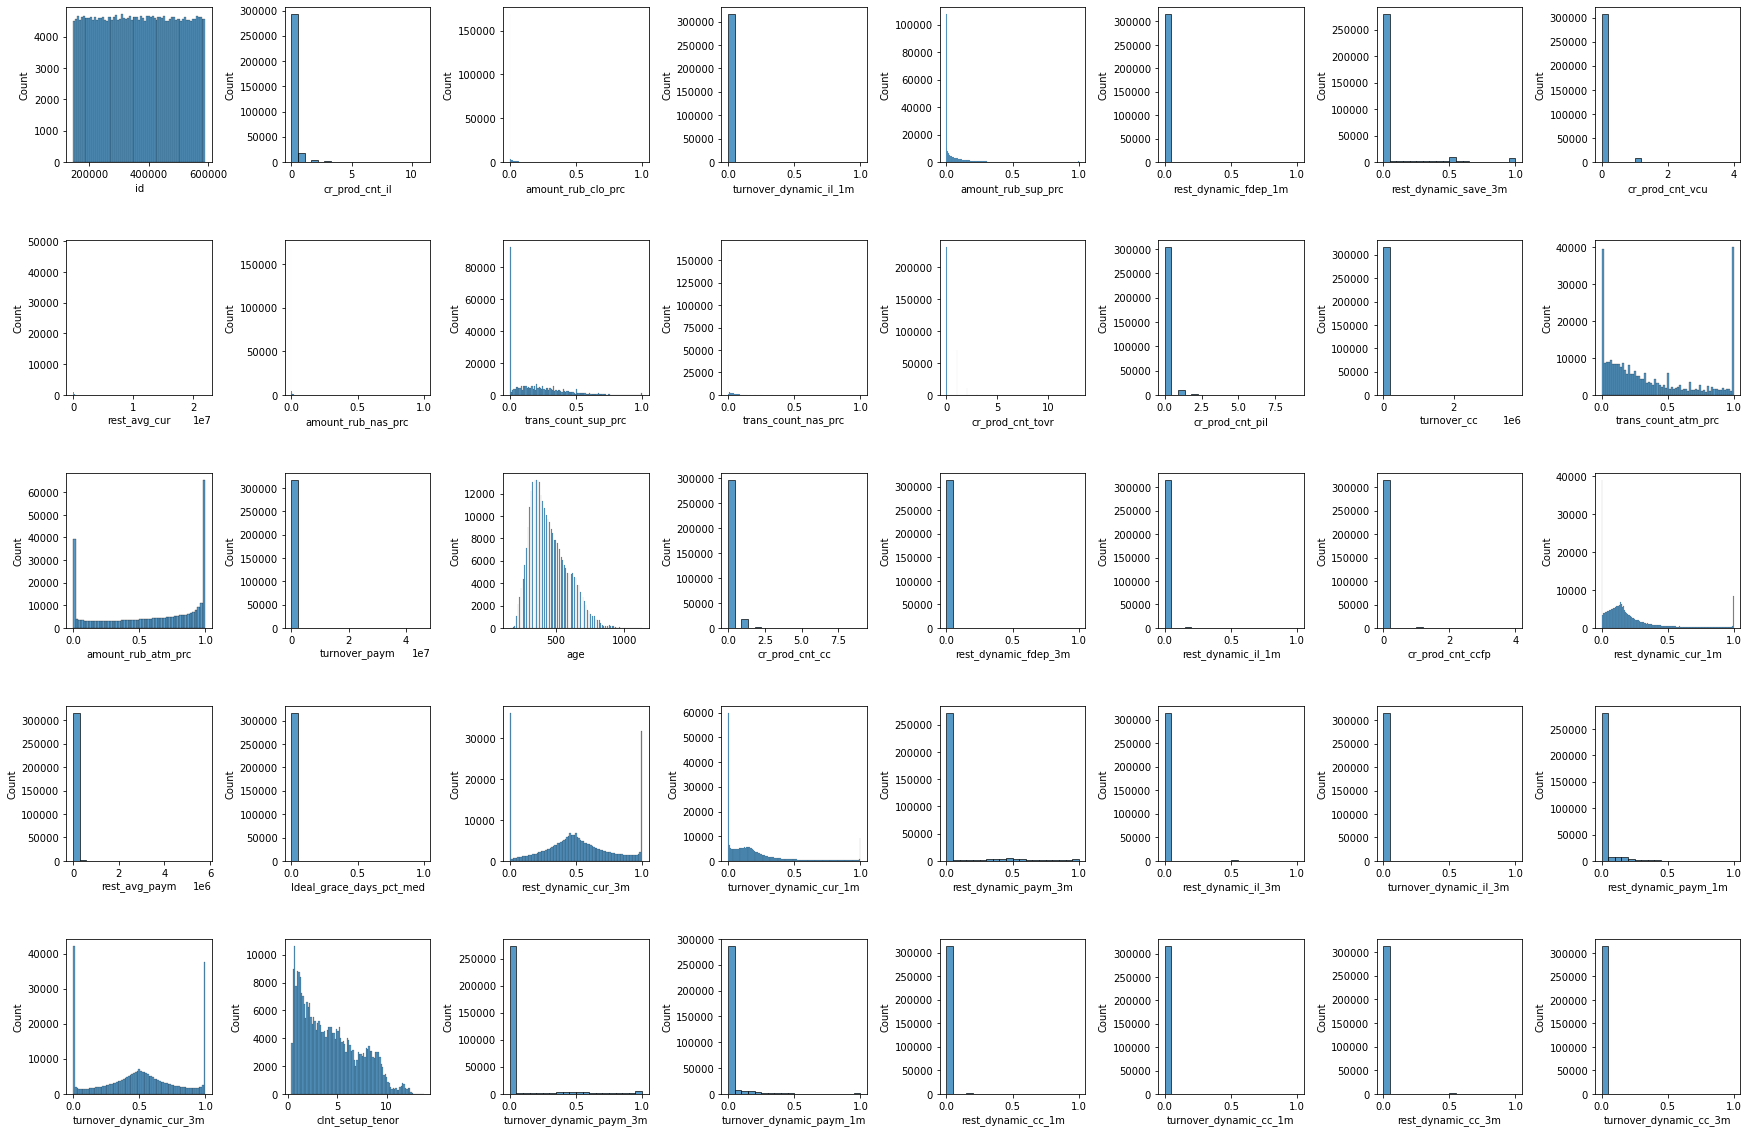

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(30, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
ncolumns = numerical_df.columns
k=0
for i in range(5):
  for j in range(8):
    if k < len(ncolumns):
      sns.histplot(data=df, x=ncolumns[k], ax=axes[i][j])
      k+=1
plt.show()

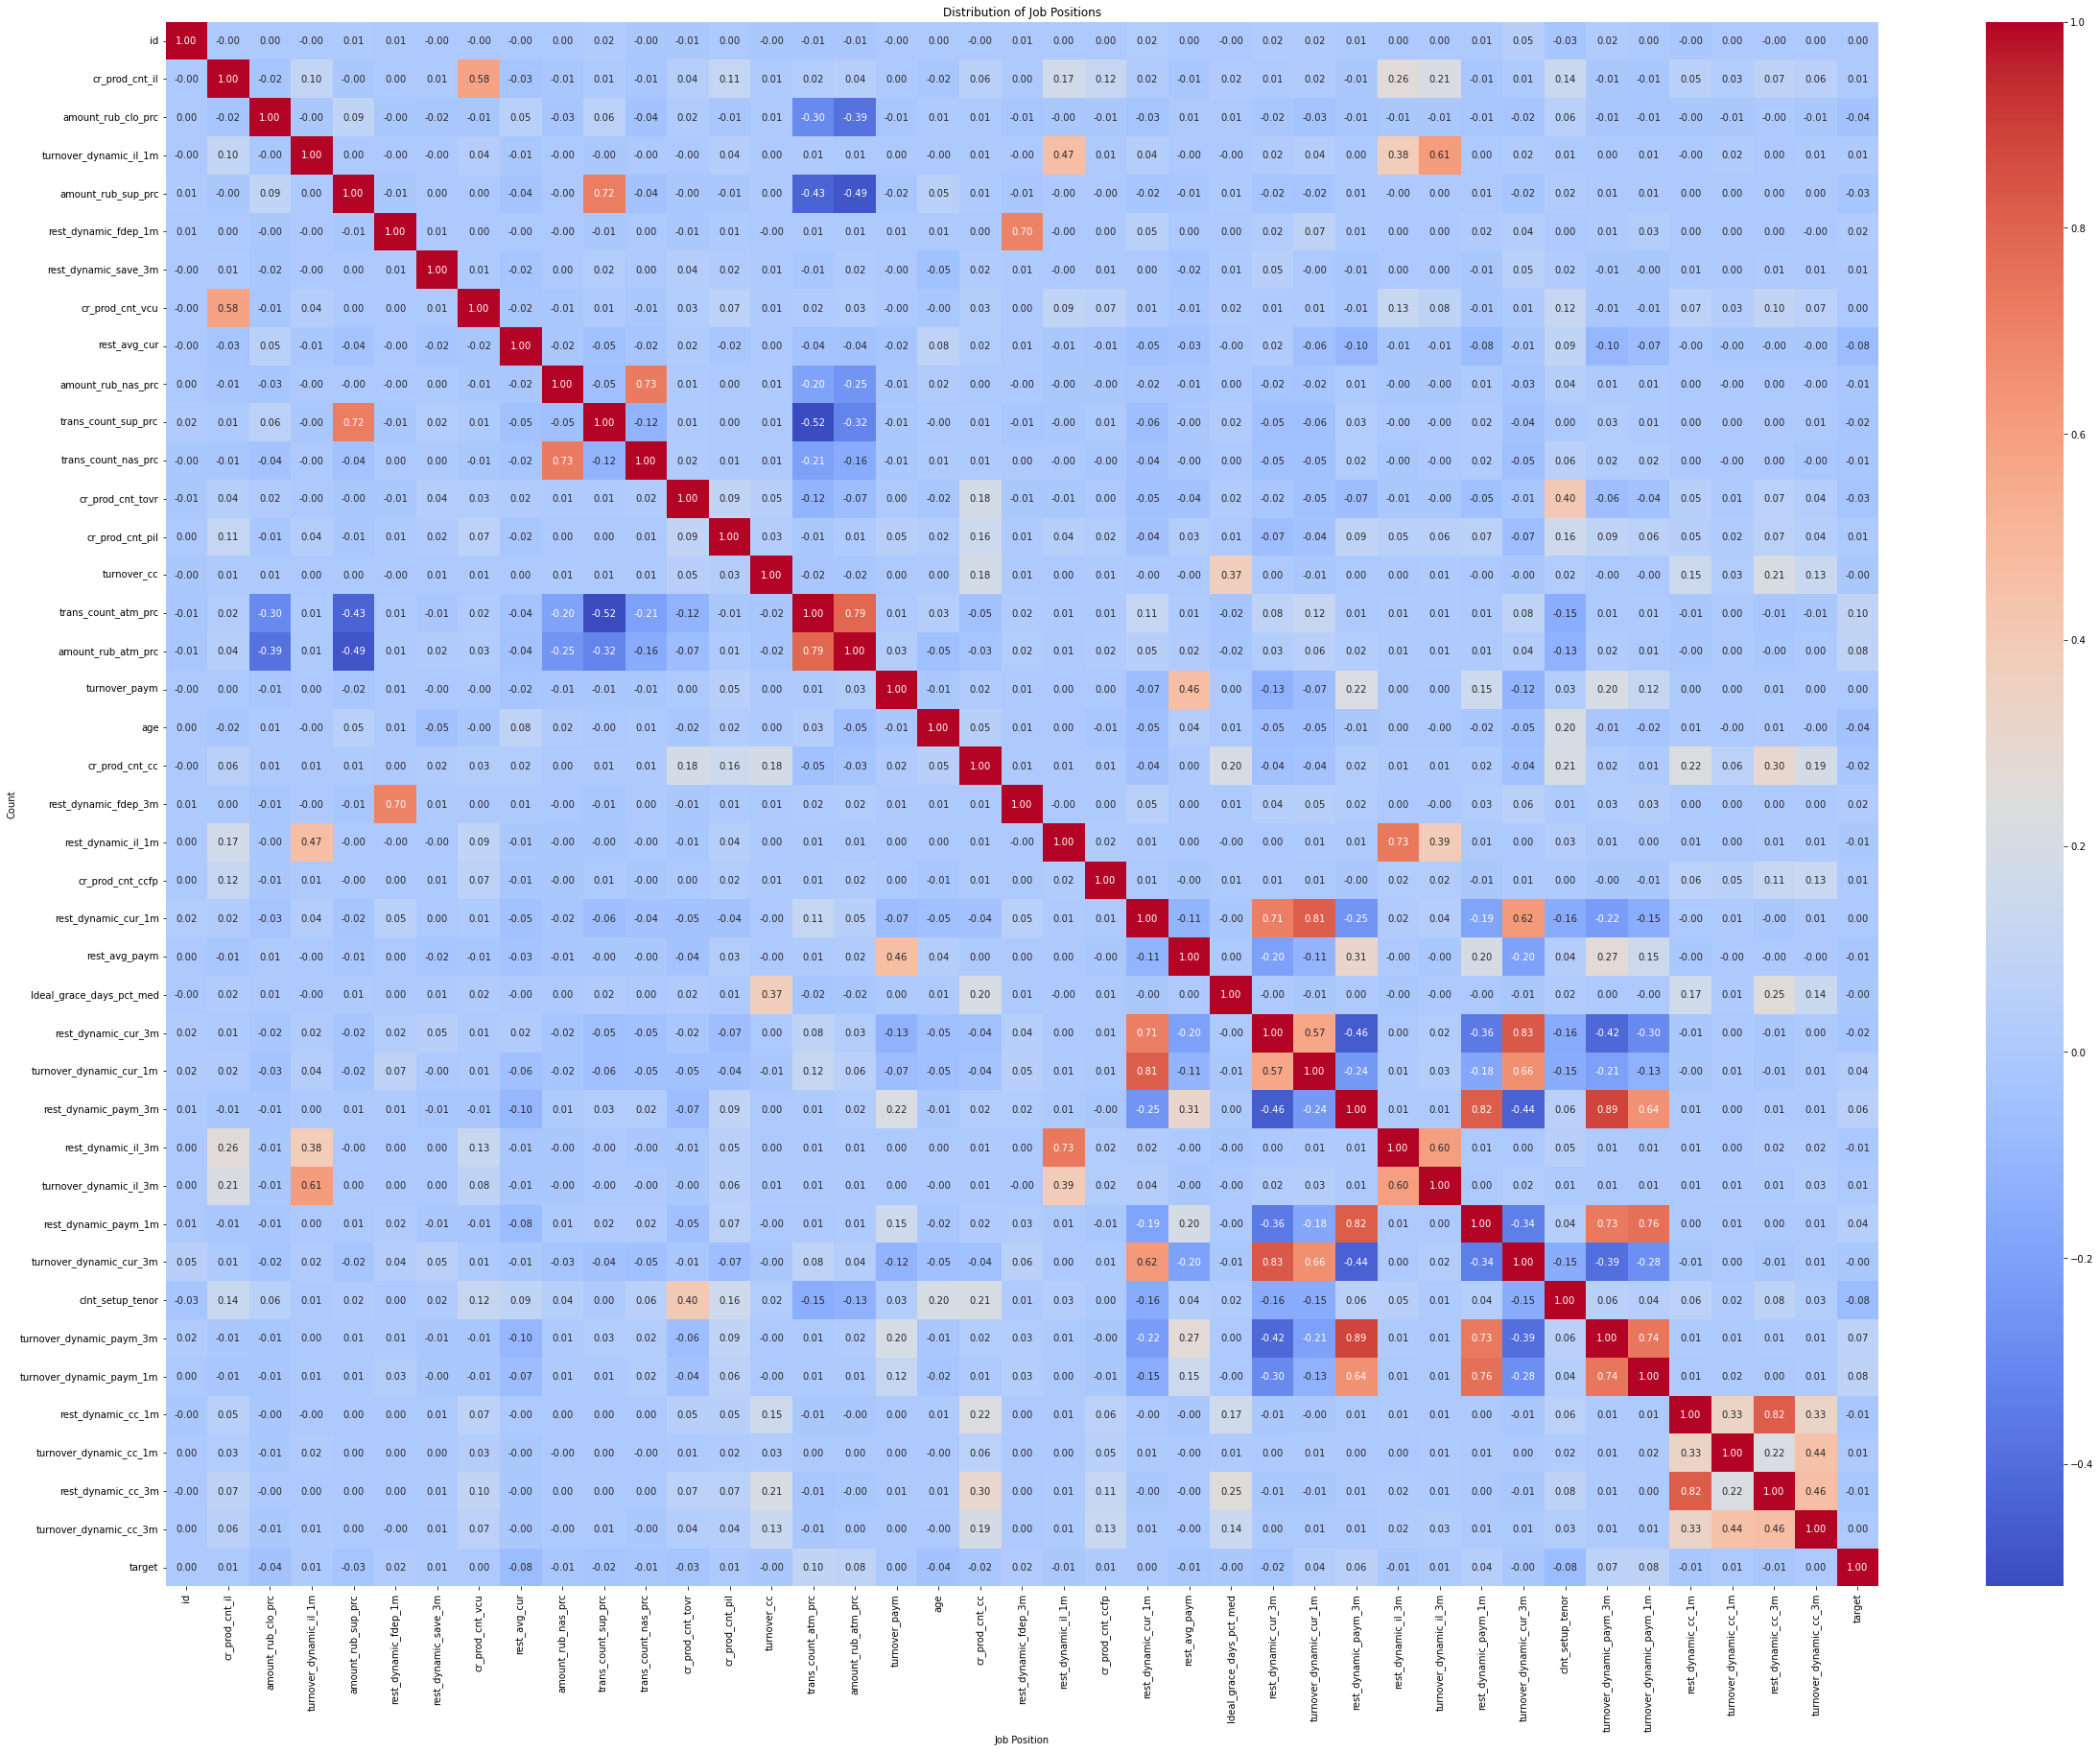

In [35]:
plt.figure(figsize=(40, 30))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xlabel('Job Position')
plt.ylabel('Count')
plt.title('Distribution of Job Positions')
plt.show()

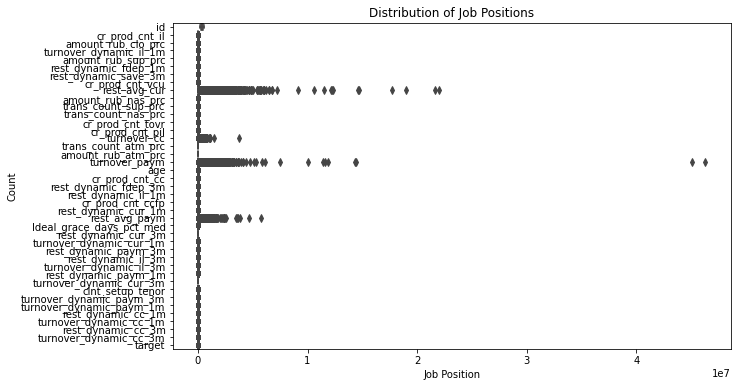

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_df, orient='h')
plt.xlabel('Job Position')
plt.ylabel('Count')
plt.title('Distribution of Job Positions')
plt.show()

In [37]:
#Logistic Regression

In [38]:
# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Preprocess the data
# Numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

In [41]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [42]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [43]:
# K-Fold Cross-Validation setup
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [44]:
# Create and train the logistic regression model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [45]:
# Handle NaN values in your target variable 'y'
# Choose an appropriate strategy based on your data and problem:

# 1. Remove rows with NaN in 'y' (if losing data is acceptable)
y = y.dropna()
X = X.loc[y.index]  # Adjust X accordingly if needed

# 2. Impute missing values with a suitable value (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')  # Choose an appropriate strategy
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Reshape and flatten

In [46]:
# After handling NaN values, proceed with cross-validation:
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

In [47]:
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())

Cross-validation scores: [0.91643261 0.91640105 0.91602234 0.91652728 0.91618014 0.91636949
 0.91633793 0.91649309 0.91639841 0.91636685]
Mean cross-validation score: 0.9163529184155885


In [48]:
#Grid Search Cross Validation
# Define the parameter grid
logi_regession_model_params = {
    'classifier__penalty': ['none', 'l2'],
    'classifier__C': np.logspace(-4, 4, 10),
    'classifier__solver': ['newton-cg'],
    'classifier__max_iter': [100]
}

In [49]:
# Initialize GridSearchCV
logi_regession_model = GridSearchCV(estimator=model, param_grid=logi_regession_model_params, scoring='accuracy', cv=2, verbose=True, n_jobs=-1)

In [50]:
# Fit the model
logi_regession_model.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['id', 'cr_prod_cnt_il', 'amount_rub_clo_prc', 'turnover_dynamic_il_1m',
       'amount_rub_sup_prc', 'rest_dynamic_fdep_1m', 'rest_dynamic_save_3m',
       'cr_prod_cnt_vcu',...
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': array(

In [51]:
#Data Prediction

In [52]:
# Generate predictions on the test data
y_pred = logi_regession_model.predict(X_test)

In [53]:
# Now calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print("Accuracy:", accuracy)

Accuracy: 0.9177265124499006


In [55]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[58160     0]
 [ 5214     0]]


In [56]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58160
           1       0.00      0.00      0.00      5214

    accuracy                           0.92     63374
   macro avg       0.46      0.50      0.48     63374
weighted avg       0.84      0.92      0.88     63374



In [57]:
#SVM

In [58]:
# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

In [59]:
# Random Sampling
fraction = 0.1
df_sampled = df.sample(frac=fraction, random_state=42)
X_sampled = df_sampled.drop(columns=['target'])
y_sampled = df_sampled['target']

In [60]:
df.shape

(316867, 42)

In [61]:
df_sampled.shape

(31687, 42)

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [63]:
# Preprocessing for numerical data
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [64]:
# Create a pipeline with PCA and SVM
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.90)),  # Start with 90% variance
    ('classifier', LinearSVC(C=1.0, random_state=42, max_iter=10000))  # Specify C parameter for LinearSVC
])

In [65]:
# Train the model
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'cr_prod_cnt_il', 'amount_rub_clo_prc', 'turnover_dynamic_il_1m',
       'amount_rub_sup_prc', 'rest_dynamic_fdep_1m', 'rest_dynamic_save_3m',
       'cr_prod_cnt_vcu', 'rest_avg_cur', 'amount_rub_n...
       'rest_dynamic_cc_1m', 'turnover_dynamic_cc_1m', 'rest_dynamic_cc_3m',
       'turnover_dynamic_cc_3m'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                              

In [66]:
# Convert the training data to a NumPy array
X_train_transformed = model.named_steps['preprocessor'].transform(X_train)
X_train_transformed = model.named_steps['pca'].transform(X_train_transformed)

# Convert the test data to NumPy array for prediction
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)
X_test_transformed = model.named_steps['pca'].transform(X_test_transformed)

In [67]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.named_steps['classifier'].decision_function(X_test_transformed)

In [68]:
print(y_pred_proba)

[-0.93905703 -0.88851765 -1.38252585 ... -0.871972   -0.79780385
 -0.75090896]


In [69]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9176


In [71]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5816    0]
 [ 522    0]]


In [72]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5816
           1       0.00      0.00      0.00       522

    accuracy                           0.92      6338
   macro avg       0.46      0.50      0.48      6338
weighted avg       0.84      0.92      0.88      6338



In [73]:
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.7162


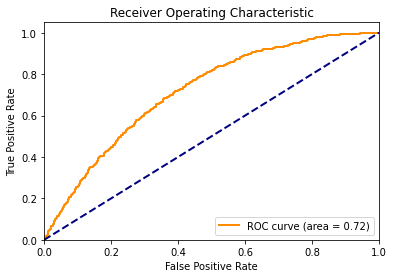

In [74]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

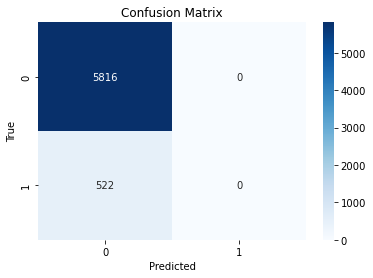

In [75]:
# Plot Confusion Matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [76]:
#LIME

In [77]:
!pip install lime

In [78]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [79]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.90)),  # Start with 90% variance
    ('classifier', SVC(probability=True, random_state=42))  # Use SVC with probability=True
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'cr_prod_cnt_il', 'amount_rub_clo_prc', 'turnover_dynamic_il_1m',
       'amount_rub_sup_prc', 'rest_dynamic_fdep_1m', 'rest_dynamic_save_3m',
       'cr_prod_cnt_vcu', 'rest_avg_cur', 'amount_rub_n...
       'rest_dynamic_cc_1m', 'turnover_dynamic_cc_1m', 'rest_dynamic_cc_3m',
       'turnover_dynamic_cc_3m'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                              

In [80]:
# Convert the training data to a NumPy array
X_train_transformed = model.named_steps['preprocessor'].transform(X_train)
X_train_transformed = model.named_steps['pca'].transform(X_train_transformed)

# Convert the test data to NumPy array for prediction
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)
X_test_transformed = model.named_steps['pca'].transform(X_test_transformed)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.named_steps['classifier'].predict_proba(X_test_transformed)[:, 1] 

In [81]:
# # Extract feature names

def get_feature_names(column_transformer, input_features=None):
    feature_names = []
    
    for name, transformer, features in column_transformer.transformers:
        # Ensure input features are provided if transformer needs them
        if input_features is not None and hasattr(transformer, 'fit'):
            # Fit the transformer to initialize attributes
            transformer.fit(input_features)
        
        if hasattr(transformer, 'get_feature_names_out'):
            # Get feature names from transformers that support it
            feature_names.extend([f"{name}__{f}" for f in transformer.get_feature_names_out()])
        elif hasattr(transformer, 'categories_'):
            # Handling one-hot encoding
            for feature, categories in zip(features, transformer.categories_):
                feature_names.extend([f"{feature}__{cat}" for cat in categories])
        elif features is not None:
            # Use provided feature names if available
            feature_names.extend([f"{name}__{f}" for f in features])
        else:
            # Handle transformers that do not have feature names capabilities
            # This assumes a default naming convention based on indices
            feature_names.extend([f"{name}__{i}" for i in range(len(features))])

    return feature_names

# Example usage
preprocessor = model.named_steps['preprocessor']
# Fit the preprocessor to ensure all attributes are available
preprocessor.fit(X_train)  # Ensure that X_train is your training data
feature_names = get_feature_names(preprocessor, input_features=X_train)

In [82]:
explainer = LimeTabularExplainer(
    training_data=X_train_transformed,  # Use transformed NumPy array
    feature_names=feature_names,  # Get feature names after transformation
    class_names=['Class 0', 'Class 1'],  
    mode='classification'
)

In [83]:
# Pick a sample instance to explain
idx = 0  # Index of the instance you want to explain
instance = X_test_transformed[idx]  # Use transformed data

In [84]:
# Generate explanation
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.named_steps['classifier'].predict_proba
)

In [85]:
# Print explanation
print("LIME Explanation:")
print(explanation.as_list())

LIME Explanation:
[('num__amount_rub_atm_prc > 0.16', 0.003986126389510234), ('num__trans_count_atm_prc > 0.16', -0.0022734527879663146), ('num__turnover_paym <= -0.30', 0.0020147807506333856), ('-1.04 < num__id <= -0.34', -0.0018539832210635867), ('-1.17 < num__cr_prod_cnt_il <= -0.09', -0.0017452934270379054), ('-0.36 < num__trans_count_sup_prc <= 0.02', -0.0015601795687120669), ('-0.28 < num__rest_avg_cur <= 0.03', -0.00116759255903938), ('num__rest_dynamic_fdep_3m > 0.14', 0.0008805124185894056), ('num__rest_dynamic_il_1m > 0.05', 0.0008407393668063938), ('num__rest_dynamic_cur_1m > 0.42', 0.000749358634778417)]


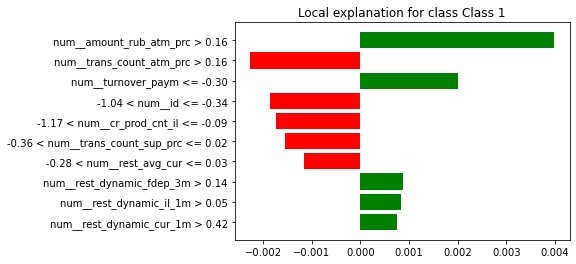

In [86]:
# Plot LIME explanation
fig = explanation.as_pyplot_figure()
plt.show()

In [87]:
#senstivity analysis

In [88]:
# Fit the model before performing sensitivity analysis
model.fit(X_train, y_train)  # Assuming you have X_train and y_train available

def sensitivity_analysis(model, X_test, y_test, thresholds):
    y_prob = model.predict_proba(X_test)[:, 1]
    results = []

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        results.append({'Threshold': threshold, 'Accuracy': accuracy, 'ROC AUC': roc_auc})

    return pd.DataFrame(results)

thresholds = np.linspace(0, 1, 11)  # Thresholds from 0 to 1
sensitivity_df = sensitivity_analysis(model, X_test, y_test, thresholds)
print(sensitivity_df)

    Threshold  Accuracy   ROC AUC
0         0.0  0.082360  0.652865
1         0.1  0.901704  0.652865
2         0.2  0.916377  0.652865
3         0.3  0.917009  0.652865
4         0.4  0.917324  0.652865
5         0.5  0.917324  0.652865
6         0.6  0.917482  0.652865
7         0.7  0.917482  0.652865
8         0.8  0.917482  0.652865
9         0.9  0.917640  0.652865
10        1.0  0.917640  0.652865


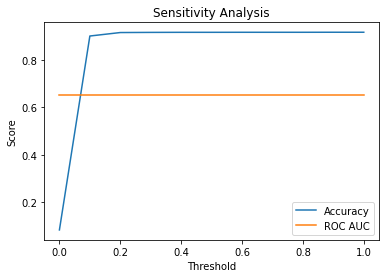

In [89]:
plt.plot(sensitivity_df['Threshold'], sensitivity_df['Accuracy'], label='Accuracy')
plt.plot(sensitivity_df['Threshold'], sensitivity_df['ROC AUC'], label='ROC AUC')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Sensitivity Analysis')
plt.show()

In [90]:
#SHAP

In [91]:
!pip install shap

In [92]:
import shap

In [93]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=20000, n_features=27, n_informative=20, n_redundant=0, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('classifier', SVC(probability=True))
])

# Fit model
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('classifier', SVC(probability=True))])

In [94]:
import shap

# Generate synthetic data for explanation (with the same number of features as PCA output)
# Note: For real use, `X_train_summarized` should be obtained from a similar pre-processing pipeline.
X_train_transformed = pipeline.named_steps['pca'].transform(X)  # Transformed data after PCA

# Use k-means to summarize the data
k = 1000  # Number of clusters
X_train_summarized = shap.kmeans(X_train_transformed, k)

# Explain predictions using KernelExplainer
explainer = shap.KernelExplainer(pipeline.named_steps['classifier'].predict_proba, X_train_summarized)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [95]:
print("Original feature shape:", X.shape)
print("Feature shape after PCA:", pipeline.named_steps['pca'].transform(X).shape)

Original feature shape: (20000, 27)
Feature shape after PCA: (20000, 10)


  0%|          | 0/100 [00:00<?, ?it/s]

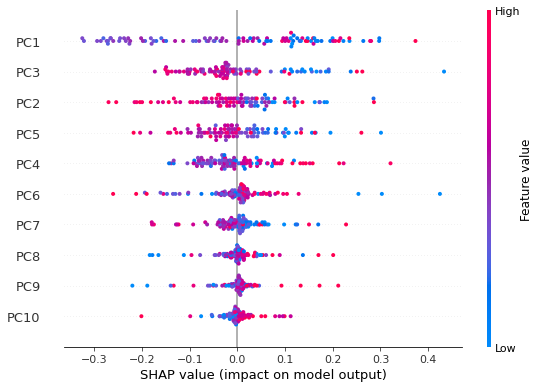

In [96]:
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Step 1: Generate a sample dataset with 1000 instances
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# Step 2: Create a pipeline with preprocessing steps and a classifier
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('classifier', SVC(probability=True))
])

# Step 3: Fit the model
pipeline.fit(X, y)

# Step 4: Generate a subset of the data and transform it
subset_indices = np.random.choice(X.shape[0], size=100, replace=False)
X_subset = X[subset_indices]
X_subset_transformed = pipeline.named_steps['pca'].transform(X_subset)

# Step 5: Calculate SHAP values using KernelExplainer
explainer = shap.KernelExplainer(pipeline.named_steps['classifier'].predict, X_subset_transformed)
shap_values = explainer.shap_values(X_subset_transformed)

# Step 6: Plot the SHAP values
shap.summary_plot(shap_values, X_subset_transformed, feature_names=[f'PC{i}' for i in range(1, 11)])


In [100]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [101]:
y_pred = log_reg_model.predict(X_test)

In [102]:
import pickle
from sklearn.linear_model import LogisticRegression

# Create your model
logi_regession_model = LogisticRegression()

# Save the model to a file
with open('LOG.pkl', 'wb') as file:
    pickle.dump(logi_regession_model, file)

In [103]:
import pickle
model = LinearSVC()
with open('svm.pkl', 'wb') as file:
    pickle.dump(model, file)